<a href="https://colab.research.google.com/github/Reis25/AprendizadoDeMquinas/blob/master/Lista6_AM_DemetriosReis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade Federal de Alagoas

Professores: Evandro Barros e Xu Yang

Aluno: Demétrios Reis Costa


In the data set (gender.xlsx), we will use Bayes classification to classify the data.
In the training dataset, we have two groups (y=gender=1 means male, y=gender=0
means female)





In [77]:
# Algoritmo de Naive Bayes

# importação das bibliotecas: 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB

import seaborn as sns

#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

url = 'https://raw.githubusercontent.com/Reis25/Testes_py/master/Gender.csv'

data_frame1 = pd.read_csv(url)

data_frame1.head()

,Gender,Height,Weight,identifier,entry_dt
0,1,"73,84701702","241,8935632",A001,01-20-17
1,1,"68,78190405","162,3104725",A002,01-20-17
2,1,"74,11010539","212,7408556",A003,01-20-17
3,1,"71,7309784","220,0424703",A004,01-20-17
4,1,"69,88179586","206,3498006",A005,01-20-17


In [78]:
# Substituindo as viírgulas por pontos e passando o valor como float

data_frame1['Height'] = data_frame1['Height'].str.replace(',', '.').astype(float)
data_frame1['Weight'] = data_frame1['Weight'].str.replace(',', '.').astype(float)

In [79]:
# Verificando a limpeza dos dados:
data_frame1.head()             

,Gender,Height,Weight,identifier,entry_dt
0,1,73.847017,241.893563,A001,01-20-17
1,1,68.781904,162.310473,A002,01-20-17
2,1,74.110105,212.740856,A003,01-20-17
3,1,71.730978,220.042470,A004,01-20-17
4,1,69.881796,206.349801,A005,01-20-17


In [81]:
# classe de resposta
y = data_frame1[['Gender']]

# colunas de trinamento 
X = data_frame1[['Height', 'Weight']]

# Separação do conjunto de dados 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Métrica Gaussiana 
gaussian = GaussianNB()

# Fit ajustável com a curva Gaussiana 
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

# Construindo a matriz de confusão 
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

print('Matriz de confusão para o Naive Bayes\n',cm,"\n")
print('accuracia para Naive Bayes: %.3f' %accuracy, '\n')
print('precision para Naive Bayes: %.3f' %precision, '\n')
print('recall para o Naive Bayes: %.3f' %recall, '\n')
print('f1-score para o Naive Bayes : %.3f' %f1, "\n\n")
print('Conjunto X: \n')
print(X.head(10),'\n')
print('Conjunto y: \n')
print(y.head())

Matriz de confusão para o Naive Bayes
 [[1328  161]
 [ 193 1318]] 

accuracia para Naive Bayes: 0.882 

precision para Naive Bayes: 0.882 

recall para o Naive Bayes: 0.882 

f1-score para o Naive Bayes : 0.882 


Conjunto X: 

      Height      Weight
0  73.847017  241.893563
1  68.781904  162.310473
2  74.110105  212.740856
3  71.730978  220.042470
4  69.881796  206.349801
5  67.253016  152.212156
6  68.785081  183.927889
7  68.348516  167.971111
8  67.018950  175.929440
9  63.456494  156.399676 

Conjunto y: 

   Gender
0       1
1       1
2       1
3       1
4       1


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
# Descrição da distribuição dos dados Weight
print(data_frame1.groupby('Gender')['Weight'].describe(),'\n')

# Descrição da distribuição dos dados Height
print(data_frame1.groupby('Gender')['Height'].describe(),'\n')

# Calculando a variancia do coluna Weight
print('Variancia do conjunto Weight: \n')
print(data_frame1.groupby('Gender')['Weight'].var(),'\n')

# Calculando a variancia do coluna Height
print('Variancia do conjunto Weight: \n')
print(data_frame1.groupby('Gender')['Height'].var(),'n')

#Checando se há valores nulos no dataset, se sim, quanto tem:
print('Numero de elementos nulos no conjunto de dados: ', data_frame1.isnull().sum().sum())

         count        mean        std  ...         50%         75%         max
Gender                                 ...                                    
0       5000.0  135.860093  19.022468  ...  136.117583  148.810926  202.237214
1       5000.0  187.020621  19.781155  ...  187.033546  200.357802  269.989698

[2 rows x 8 columns] 

         count       mean       std  ...        50%        75%        max
Gender                               ...                                 
0       5000.0  63.708774  2.696284  ...  63.730924  65.563565  73.389586
1       5000.0  69.026346  2.863362  ...  69.027709  70.988744  78.998742

[2 rows x 8 columns] 

Variancia do conjunto Weight: 

Gender
0    361.854281
1    391.294074
Name: Weight, dtype: float64 

Variancia do conjunto Weight: 

Gender
0    7.269947
1    8.198843
Name: Height, dtype: float64 n
Numero de elementos nulos no conjunto de dados:  0



(1) Calculate the mean and variance of height and weight of each training
group.

In [85]:
# Media do conjunto de treino: 

media_train_group = X_train.mean()
print(media_train_group)

Height     66.375628
Weight    161.515520
dtype: float64


In [86]:
# Variancia do conjunto de treino

variance_train_group = X_train.var()
print(variance_train_group)

Height      14.739351
Weight    1027.436397
dtype: float64


(2) Use normal distribution to fit the data for each group. That is, obtain
fh1(density function for height and y = 1 ), fw1(density function for weight
and y = 1), fh0 (density function for height and y = 0), fw0 (density
function for weight and y = 0), where the density function is given by
f(px|μ, σ2) = (1/2πσ2)*e^(x-y)²/2σ²





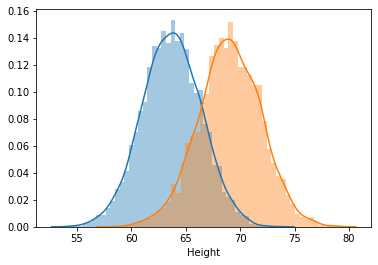

In [71]:
sns.distplot(data_frame1[data_frame1['Gender']==0].Height)
sns.distplot(data_frame1[data_frame1['Gender']==1].Height)

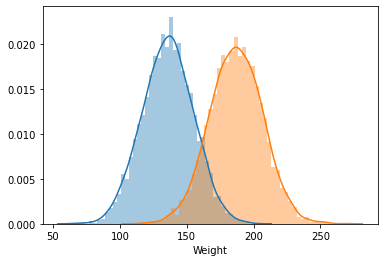

In [72]:
sns.distplot(data_frame1[data_frame1['Gender']==0].Weight)
sns.distplot(data_frame1[data_frame1['Gender']==1].Weight)

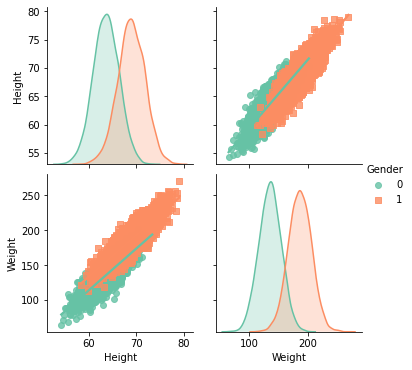

In [36]:
# Correlção com dados separados bem como suas distribuições
sns.pairplot(data_frame1, kind="reg", hue="Gender", markers=["o", "s"], palette="Set2")
plt.show()


(3) Make a scatter plot for each group about height and weight.



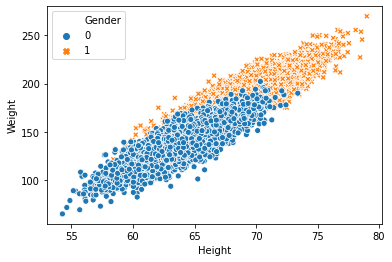

In [37]:
sns.scatterplot(data=data_frame1, x="Height", y="Weight", hue="Gender", style="Gender")


(4) Calculate the probabilities P(y = 1), P(y =0).



In [ ]:
print(data_frame1['Gender'].value_counts())

1    5000
0    5000
Name: Gender, dtype: int64


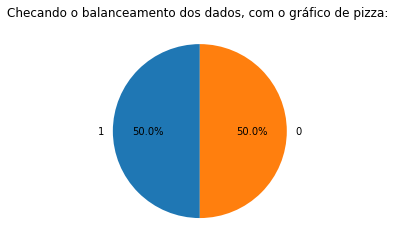

In [38]:
#Checking if data is balanced or not using pie chart for our target variable - gender
labels = data_frame1.Gender.unique()
sizes = [(data_frame1.Gender == labels[0]).sum(), (data_frame1.Gender == labels[1]).sum()]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle = 90)
plt.title("Checando o balanceamento dos dados, com o gráfico de pizza: ")
plt.show()

Probabilidade embos é de 50% buscando um dado aleatório. 


(5) Suppose the new data has height=68, weight=169. Suppose the height and
weight are conditional independent. Calculate:

*   fh1(h = 68|y = 1), 
*   fw1(w = 169|y = 1),
*   fh0(h = 68|y = 0), 
*   fw0(w = 169|y = 0)
*   fhw1((h = 68, w = 169)|y = 1), 
*   fhw0((h = 68, w = 169)|y = 0))


In [ ]:

# Média e Variancia para males (1)
media_height_males      =  data_frame1[data_frame1['Gender']==1].Height.mean() #63.708774
media_weight_males      =  data_frame1[data_frame1['Gender']==1].Weight.mean() #187.020621
variancia_height_males  =  data_frame1[data_frame1['Gender']==1].Height.var()  #8.198843
variancia_weight_males  =  data_frame1[data_frame1['Gender']==1].Weight.var()  #391.294074

# Média e Variância para females (0)
media_height_females     = data_frame1[data_frame1['Gender']==0].Weight.mean() #69.026346  
media_weight_females     = data_frame1[data_frame1['Gender']==0].Weight.mean() #135.860093
variancia_height_females = data_frame1[data_frame1['Gender']==0].Weight.var()  #7.269947
variancia_weight_females = data_frame1[data_frame1['Gender']==0].Weight.var()  #361.854281

# Função que calcula gaussiana:
def PDF(x, mean, variance):  
    pd = 1 / (np.sqrt(2 * np.pi * variance)) * np.exp((-(x - mean)**2) / (2 * variance))  
    return pd

# Vetor com as médias de Height e Weight, respectivamente.
def predict_class(height, weight):
  p_height_males   = PDF(h, media_height_males,   variancia_height_males)
  p_weight_males   = PDF(w, media_weight_males,   variancia_weight_males)
  p_height_females = PDF(h, media_height_females, variancia_height_females)
  p_weight_females = PDF(w, media_weight_females, variancia_weight_females)


  # Calculando a probabilidade de cada classe; O valor de 0.5 é a chance aleatória de cada classe; 
  p_male_h_and_w   = (0.5) * p_height_males * p_weight_males  
  p_female_h_and_w = (0.5) * p_height_females * p_weight_females 

  print("Probabilidade de ser 0 (male): \n")
  print("P(Male   | height & weight) =", p_male_h_and_w/(p_male_h_and_w + p_female_h_and_w ),'\n') 
  print("Probabilidade de ser 1 (female): \n") 
  print("P(Female | height & weight) =", p_female_h_and_w/(p_male_h_and_w + p_female_h_and_w ),'\n')
  print("Soma das probabilidades: ",(p_female_h_and_w + p_male_h_and_w)/(p_male_h_and_w + p_female_h_and_w ),'\n')

  # Print da predição de que classe pertence o elemento:
  if (p_male_h_and_w > p_female_h_and_w):  
      print("classe = Male \n")  
  else:  
      print("classe = Female\n")

In [99]:
print("Probabilidade de ser 1 (male)   com 68  (height): ", PDF(68,  media_height_males, variancia_height_males),'\n')
print("Probabilidade de ser 1 (male)   com 169 (weight): ", PDF(169, media_weight_males, variancia_weight_males),'\n')
print("Probabilidade de ser 0 (female) com 68  (height): ", PDF(68,  media_height_females, variancia_height_females),'\n')
print("Probabilidade de ser 0 (female) com 168 (weight): ", PDF(169, media_weight_females, variancia_weight_females),'\n')

Probabilidade de ser 1 (male)   com 68  (height):  0.045323200386344804 

Probabilidade de ser 1 (male)   com 169 (weight):  0.01331814044539428 

Probabilidade de ser 0 (female) com 68  (height):  0.13761972341418 

Probabilidade de ser 0 (female) com 168 (weight):  0.004598179423604598 



In [104]:
print("A probabilidade de ser h = 68 e w = 169 sendo y = 1 é: ", PDF(68,  media_height_males, variancia_height_males)*PDF(169, media_weight_males, variancia_weight_males))
print("A probabilidade de ser h = 68 e w = 169 sendo y = 0 é: ", PDF(68,  media_height_females, variancia_height_females)*PDF(169, media_weight_females, variancia_weight_females))

A probabilidade de ser h = 68 e w = 169 sendo y = 1 é:  0.0006036207481800883
A probabilidade de ser h = 68 e w = 169 sendo y = 0 é:  0.0006328001804852384


(6) Use Bayes Theorem to calculate density of the posteriori (f(y|x)∝f(x|y)P(y)):
f(y = 1|x = (h = 68, w = 169)), f(y = 0|x = (h = 68, w = 169))



In [98]:
predict_class(68, 169)

Probabilidade de ser 0 (male): 

P(Male   | height & weight) = 0.4882000410909219 

Probabilidade de ser 1 (female): 

P(Female | height & weight) = 0.5117999589090781 

Soma das probabilidades:  1.0 

classe = Female



(7) Compare which is larger and make a conclusion that which group this new
data should be.



Como temos uma probabilidade maior em P(Male| height & weight) concluímos que possivelmente esses são atributos do rótulo female

(8) Suppose the new data has height=50, weight=100. Repeat the questions
(5-7).

In [106]:
print("Probabilidade de ser 1 (male)   com 50  (height): ", PDF(50,  media_height_males, variancia_height_males),'\n')
print("Probabilidade de ser 1 (male)   com 100 (weight): ", PDF(100, media_weight_males, variancia_weight_males),'\n')
print("Probabilidade de ser 0 (female) com 50  (height): ", PDF(50,  media_height_females, variancia_height_females),'\n')
print("Probabilidade de ser 0 (female) com 100 (weight): ", PDF(100, media_weight_females, variancia_weight_females),'\n')
print('---------------------------------------')
predict_class(50, 100)
print('---------------------------------------')
print("A probabilidade de ser h = 50 e w = 100 sendo y = 1 é: ", PDF(50,  media_height_males, variancia_height_males)*PDF(100, media_weight_males, variancia_weight_males),'\n')
print("A probabilidade de ser h = 50 e w = 100 sendo y = 0 é: ", PDF(50,  media_height_females, variancia_height_females)*PDF(100, media_weight_females, variancia_weight_females), '\n')

Probabilidade de ser 1 (male)   com 50  (height):  1.4678261874084145e-06 

Probabilidade de ser 1 (male)   com 100 (weight):  1.265545175202557e-06 

Probabilidade de ser 0 (female) com 50  (height):  2.2774663379245625e-12 

Probabilidade de ser 0 (female) com 100 (weight):  0.003547743629059842 

---------------------------------------
Probabilidade de ser 0 (male): 

P(Male   | height & weight) = 0.9956692113575494 

Probabilidade de ser 1 (female): 

P(Female | height & weight) = 0.004330788642450644 

Soma das probabilidades:  1.0 

classe = Male 

---------------------------------------
A probabilidade de ser h = 50 e w = 100 sendo y = 1 é:  1.857600349510683e-12 

A probabilidade de ser h = 50 e w = 100 sendo y = 0 é:  8.079866690770115e-15 

